# Linear Simple Regression

# Simple Linear Regression

Simple linear regression is a method used to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable (independent variable) and the other is considered to be a dependent variable.

The form of the linear equation is:

$$
y = \beta_0 + \beta_1 x + \epsilon
$$

Where:
- $y$ is the dependent variable (what you are trying to predict).
- $x$ is the independent variable (the input variable).
- $\beta_0$ is the intercept (the value of $y$ when $x = 0$).
- $\beta_1$ is the slope (the change in $y$ for a unit change in $x$).
- $\epsilon$ is the error term (the difference between the observed value and the predicted value).

## Goal of Linear Regression

The goal is to find the best-fitting line through the data points. This means finding the values of $\beta_0$ and $\beta_1$ that minimize the sum of the squared errors:

$$
\text{SSE} = \sum (y_i - \hat{y_i})^2
$$

Where:
- $y_i$ is the actual value of the dependent variable.
- $\hat{y_i}$ is the predicted value from the linear equation.

## Assumptions of Simple Linear Regression

1. **Linearity**: There is a linear relationship between the independent variable and the dependent variable.
2. **Independence**: The residuals (errors) are independent of each other.
3. **Homoscedasticity**: The variance of residuals is constant across all levels of the independent variable.
4. **Normality of residuals**: The residuals are normally distributed.

## Example

Let’s consider an example where we want to predict the price of a house based on its size.

- $y$ = Price of the house
- $x$ = Size of the house (in square feet)

A linear regression model would estimate the relationship between house size and price and provide us with a best-fit line, like:

$$
\text{Price} = 50,000 + 100 \times (\text{Size in sq. ft.})
$$

In this example:
- The intercept $\beta_0$ is 50,000, meaning that even if the house is 0 sq. ft., the predicted price would start at 50,000.
- The slope $\beta_1$ is 100, meaning that for each additional square foot, the price increases by $100.

## Evaluation
**R-squared Value**: This value indicates how well the independent variable explains the variation in the dependent variable (price). An R-squared closer to 1 means a better fit.

The formula for the R-squared ($R^2$) value, also known as the coefficient of determination, is:

$$
R^2 = 1 - \frac{\text{SS}_{\text{res}}}{\text{SS}_{\text{tot}}}
$$

Where:
- $\text{SS}_{\text{res}}$ is the **residual sum of squares**, which measures the discrepancy between the observed values and the predicted values:
  
  $$
  \text{SS}_{\text{res}} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
  $$
  where $y_i$ are the observed values, and $\hat{y}_i$ are the predicted values.
  
- $\text{SS}_{\text{tot}}$ is the **total sum of squares**, which measures the total variance in the observed data:

  $$
  \text{SS}_{\text{tot}} = \sum_{i=1}^{n} (y_i - \bar{y})^2
  $$
  where $y_i$ are the observed values, and $\bar{y}$ is the mean of the observed values.

### Interpretation of $R^2$:
- $R^2 = 1$: The model explains all the variability in the data (perfect fit).
- $R^2 = 0$: The model explains none of the variability in the data (no fit, equivalent to just predicting the mean).
- A negative $R^2$ can occur when the model is worse than a horizontal line at the mean of the data.


## Setup

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

In [3]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [20]:
# get the type of each column
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Linear Regression with bedrooms as independent variable:
Coefficient (Slope): 119634.32393857591
Intercept: 134823.86896686128
MAE: 226315.73582652194 MSE: 136910807648.61534 RMSE: 370014.60464232403 R^2 0.09436575511711598
Conclusion: bedrooms has a weak relationship with price (R-squared = 0.09).
--------------------------------------------------


d:\anaconda\envs\venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


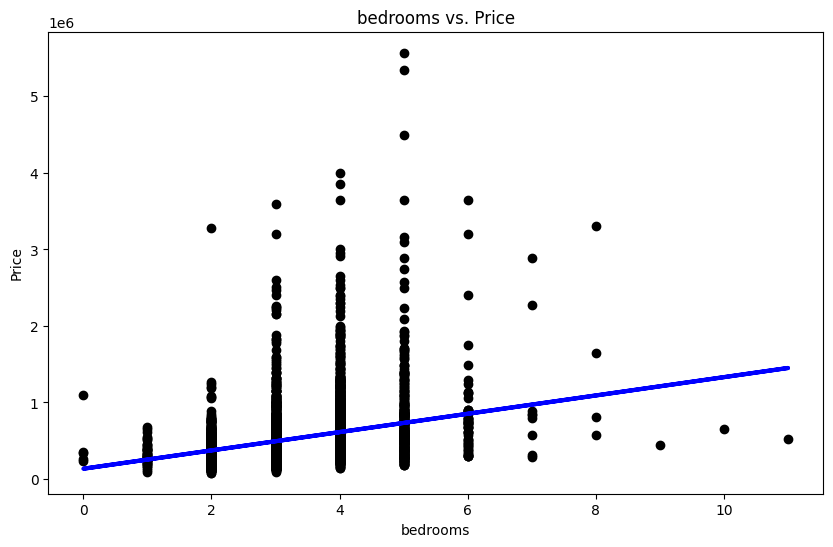

d:\anaconda\envs\venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Linear Regression with bathrooms as independent variable:
Coefficient (Slope): 248246.98686054515
Intercept: 13025.031620255904
MAE: 208742.3607099259 MSE: 110412721329.78844 RMSE: 332284.09731702245 R^2 0.26964464512105635
Conclusion: bathrooms has a weak relationship with price (R-squared = 0.27).
--------------------------------------------------


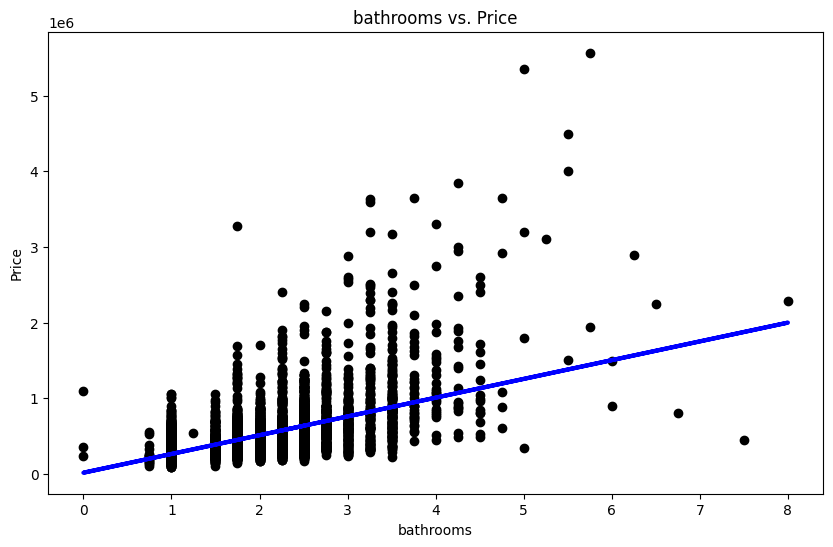

Linear Regression with sqft_living as independent variable:
Coefficient (Slope): 279.5547793152631
Intercept: -41999.1860399358
MAE: 177867.54034434847 MSE: 76484977061.77612 RMSE: 276559.1746114674 R^2 0.49406905389089006
Conclusion: sqft_living has a moderate relationship with price (R-squared = 0.49).
--------------------------------------------------


d:\anaconda\envs\venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


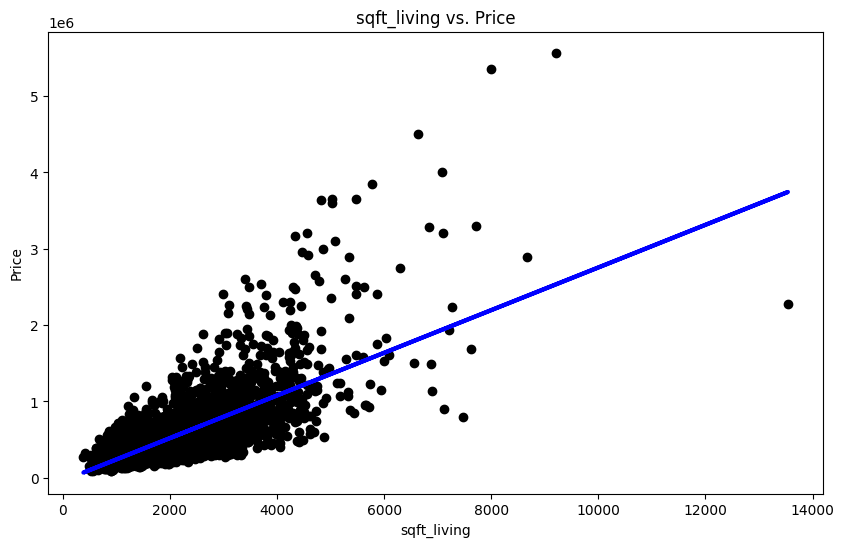

d:\anaconda\envs\venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Linear Regression with sqft_lot as independent variable:
Coefficient (Slope): 0.8472697193108711
Intercept: 525229.3479638515
MAE: 239077.41332698066 MSE: 150243188828.6073 RMSE: 387612.1629007626 R^2 0.006175047825244251
Conclusion: sqft_lot has a weak relationship with price (R-squared = 0.01).
--------------------------------------------------


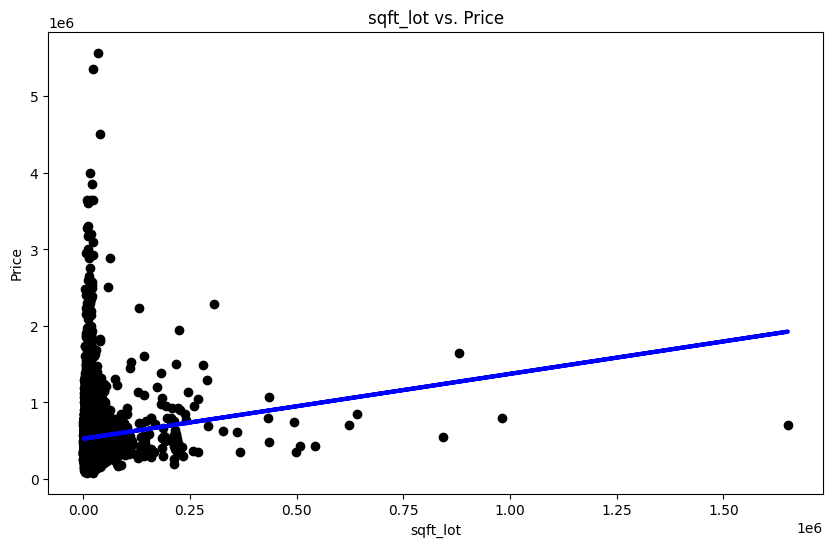

d:\anaconda\envs\venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Linear Regression with floors as independent variable:
Coefficient (Slope): 168756.1788890343
Intercept: 284775.3044596175
MAE: 226804.8928210715 MSE: 140508862448.24808 RMSE: 374845.11794639676 R^2 0.0705654306761434
Conclusion: floors has a weak relationship with price (R-squared = 0.07).
--------------------------------------------------


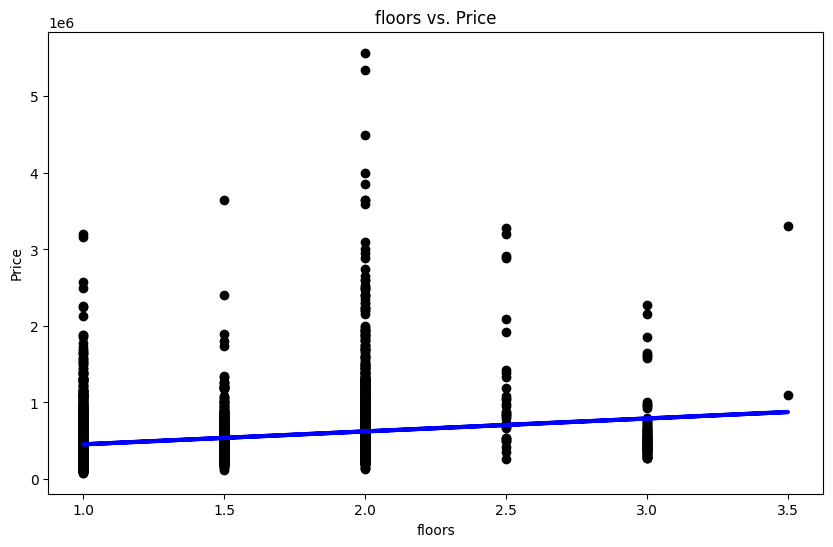

d:\anaconda\envs\venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Linear Regression with condition as independent variable:
Coefficient (Slope): 20157.982611683216
Intercept: 469078.1774128085
MAE: 239558.603708537 MSE: 151109952013.50565 RMSE: 388728.6354431657 R^2 0.00044160401661275106
Conclusion: condition has a weak relationship with price (R-squared = 0.00).
--------------------------------------------------


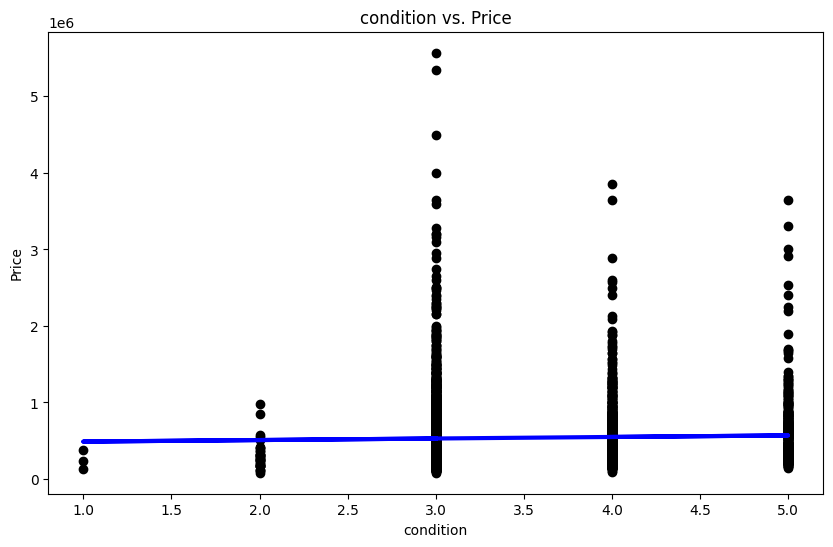

d:\anaconda\envs\venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Linear Regression with grade as independent variable:
Coefficient (Slope): 205414.00368192227
Intercept: -1034439.1340802305
MAE: 176191.2724752816 MSE: 82340423990.71027 RMSE: 286950.2116930919 R^2 0.4553365874843879
Conclusion: grade has a moderate relationship with price (R-squared = 0.46).
--------------------------------------------------


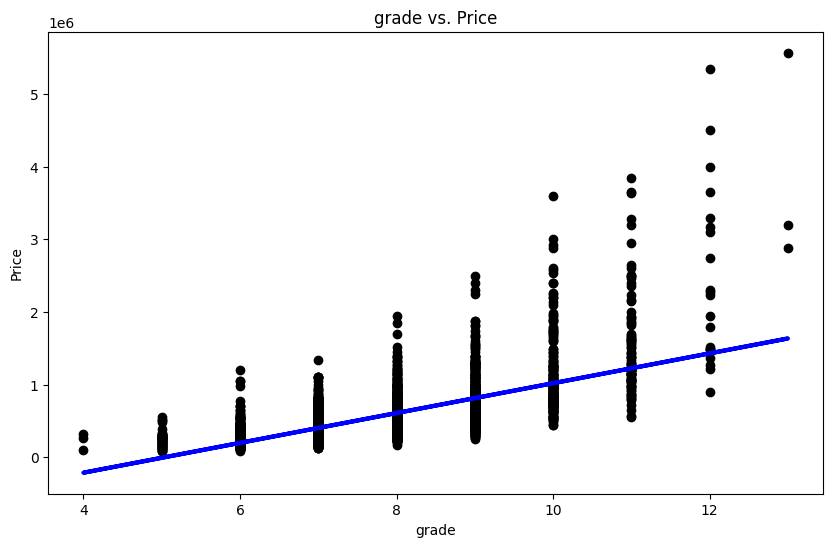

d:\anaconda\envs\venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Linear Regression with sqft_above as independent variable:
Coefficient (Slope): 265.3943432690191
Intercept: 63783.78949761618
MAE: 194207.80752423994 MSE: 94392651194.58461 RMSE: 307233.870519812 R^2 0.37561381124490323
Conclusion: sqft_above has a moderate relationship with price (R-squared = 0.38).
--------------------------------------------------


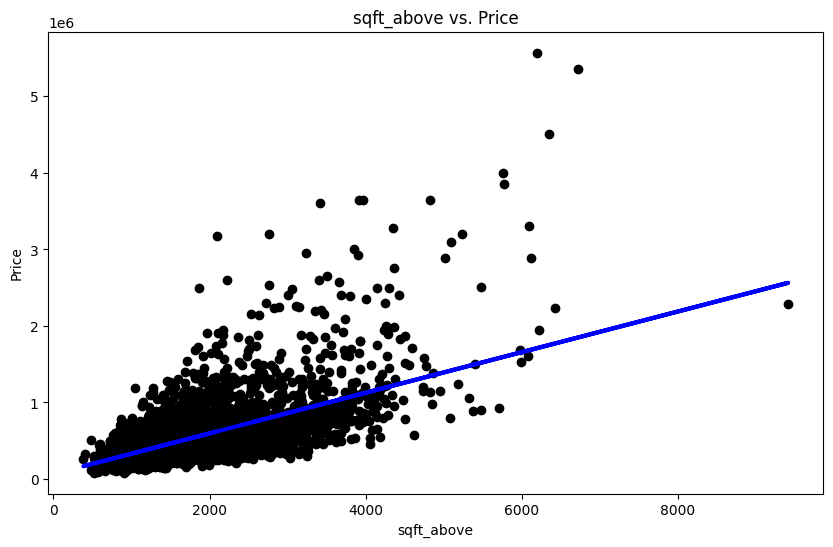

d:\anaconda\envs\venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Linear Regression with sqft_basement as independent variable:
Coefficient (Slope): 264.78854303222073
Intercept: 461526.75837338006
MAE: 231348.05667663406 MSE: 134626081668.89374 RMSE: 366914.270189773 R^2 0.10947870436448248
Conclusion: sqft_basement has a weak relationship with price (R-squared = 0.11).
--------------------------------------------------


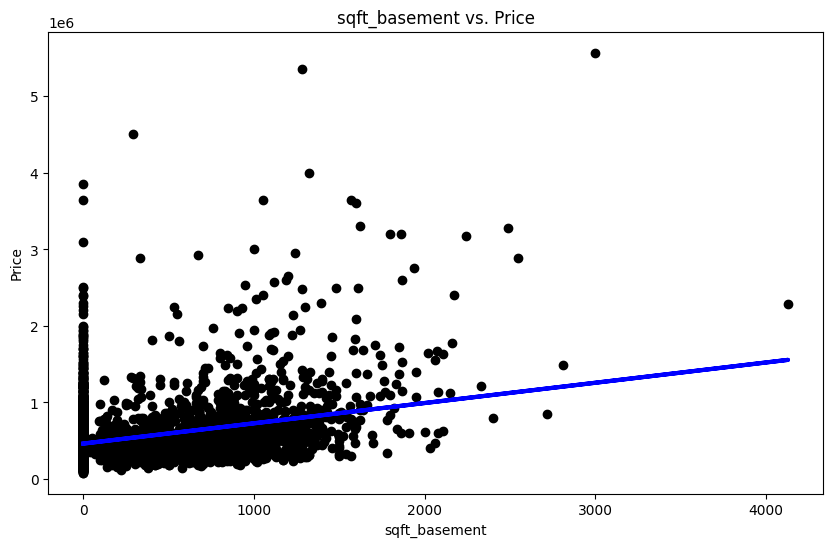

d:\anaconda\envs\venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Linear Regression with waterfront_1 as independent variable:
Coefficient (Slope): 1083501.7122198862
Intercept: 529997.4168123038
MAE: 234237.40204204997 MSE: 137008115409.98126 RMSE: 370146.073071134 R^2 0.09372208612925903
Conclusion: waterfront_1 has a weak relationship with price (R-squared = 0.09).
--------------------------------------------------


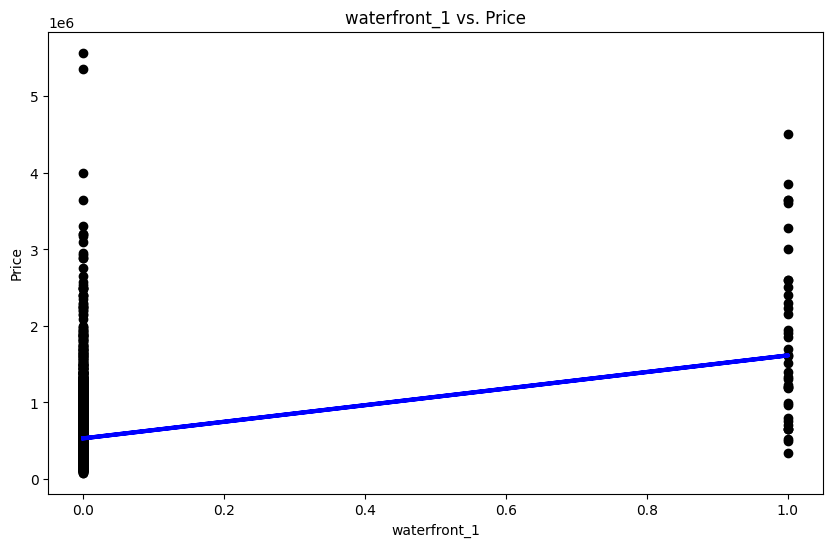

d:\anaconda\envs\venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Linear Regression with view_1 as independent variable:
Coefficient (Slope): 264992.7295904605
Intercept: 533553.2995004408
MAE: 239112.78175048655 MSE: 149941877849.14157 RMSE: 387223.29197653075 R^2 0.008168152285366381
Conclusion: view_1 has a weak relationship with price (R-squared = 0.01).
--------------------------------------------------


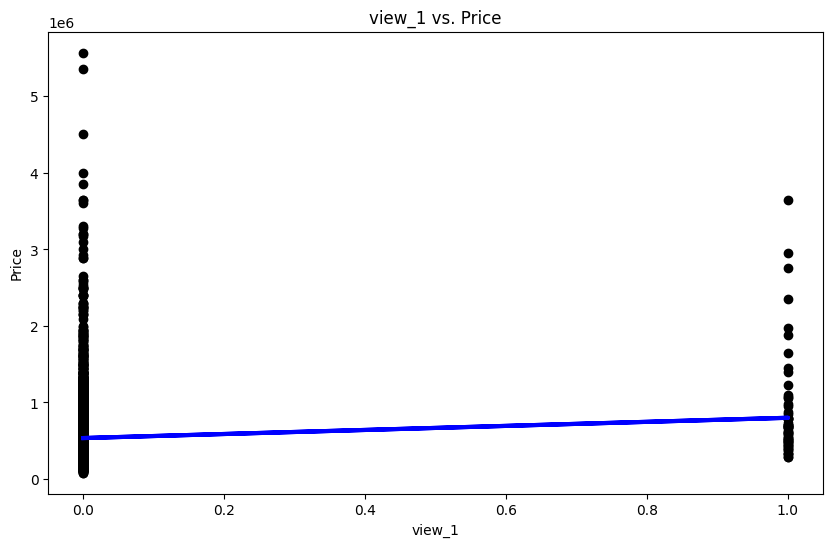

d:\anaconda\envs\venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Linear Regression with view_2 as independent variable:
Coefficient (Slope): 273844.4690396759
Intercept: 525366.6471799846
MAE: 236646.220117813 MSE: 149461179393.60104 RMSE: 386602.09439888067 R^2 0.011347864612512248
Conclusion: view_2 has a weak relationship with price (R-squared = 0.01).
--------------------------------------------------


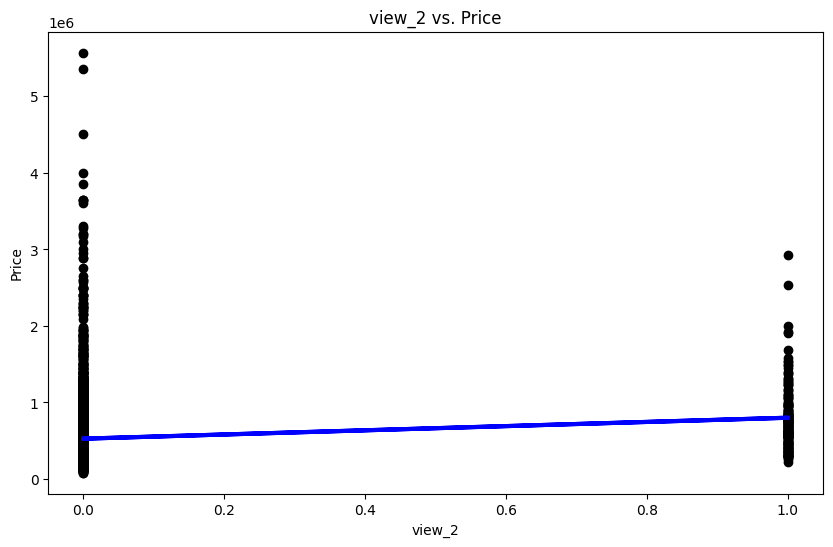

d:\anaconda\envs\venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Linear Regression with view_3 as independent variable:
Coefficient (Slope): 446801.3022877389
Intercept: 527534.7734698701
MAE: 235767.3944559205 MSE: 146638916167.90445 RMSE: 382934.6108252745 R^2 0.030016502020775437
Conclusion: view_3 has a weak relationship with price (R-squared = 0.03).
--------------------------------------------------


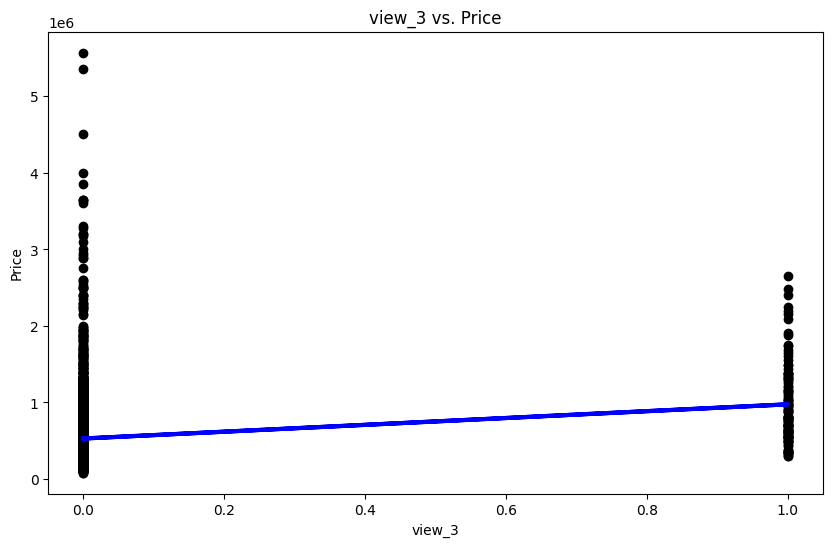

d:\anaconda\envs\venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Linear Regression with view_4 as independent variable:
Coefficient (Slope): 879545.6809388768
Intercept: 525050.4990610341
MAE: 231581.3523850266 MSE: 131747007035.79158 RMSE: 362969.7053967336 R^2 0.12852313647391
Conclusion: view_4 has a weak relationship with price (R-squared = 0.13).
--------------------------------------------------


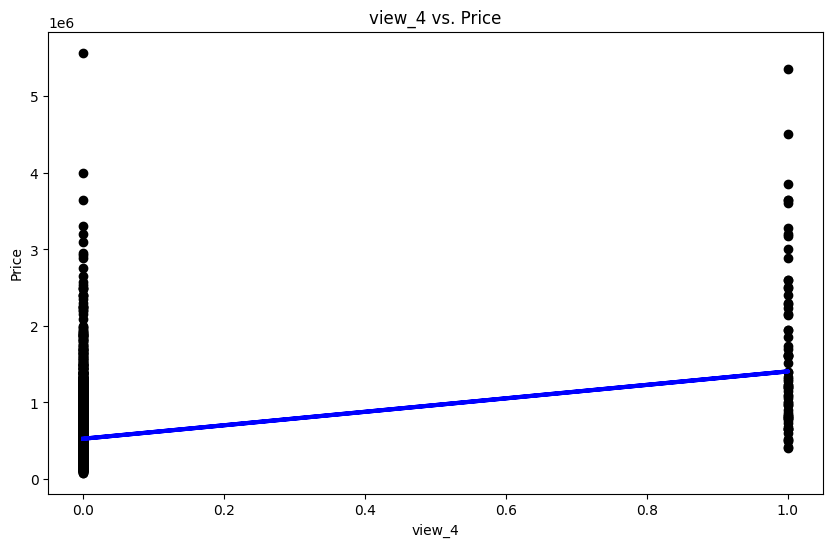

In [21]:
# List of independent variables (features) to try
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
            'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement']

# Target variable
y = df['price']

# Loop over each feature and perform linear regression
for feature in features:
    X = df[[feature]]  # Independent variable (feature)
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and fit the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict the values using the model
    y_pred = model.predict(X_test)
    
    # Calculate R-squared value
    r2 = r2_score(y_test, y_pred)

    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
    mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
    rmse = mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Output the results
    print(f"Linear Regression with {feature} as independent variable:")
    print(f"Coefficient (Slope): {model.coef_[0]}")
    print(f"Intercept: {model.intercept_}")
    print('MAE: {} MSE: {} RMSE: {} R^2 {}'.format(mae, mse, rmse, r2))
    
    # Interpretation of results
    if r2 > 0.7:
        print(f"Conclusion: {feature} has a strong relationship with price (R-squared = {r2:.2f}).")
    elif 0.3 <= r2 <= 0.7:
        print(f"Conclusion: {feature} has a moderate relationship with price (R-squared = {r2:.2f}).")
    else:
        print(f"Conclusion: {feature} has a weak relationship with price (R-squared = {r2:.2f}).")
    
    print("-" * 50)

    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test, y_test, color='black')
    plt.plot(X_test, y_pred, color='blue', linewidth=3)
    plt.title(f'{feature} vs. Price')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.show()
